# Machine Learning & Statistics Module
### Assessment by Simona Vasiliauskaite G00263352
### Analysis of Boston Housing Database
### 2019

 **Section 1.** Summary of the Boston House Prices dataset using descriptive analysis and plots.

Before analysing data, import and load the required Python libraries and the dataset as shown below.

In [1]:
# Import Python libraries needed for this project

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns
import scipy.stats as stats

import sklearn
import statsmodels.api as sm

%matplotlib inline

In [2]:
# Import Boston Housing dataset from sci-kit learn library
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# Check what field names are in this dataset

print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# Print the dataset description

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Describe method allowed me to overview the data in more detail and indicated that Median Value is normally the target. This method also provided me with a summary of other 13 variables that might influence the price of the houses such as access to highways, average number of rooms per house, business per town or crime rate to name a few.

Before using predictive analysis, I created a DataFrame called 'bhp' short for Boston House Prices which contains all the data. I checked for the first 5 columns of the dataset using head()

In [5]:
bhp = pd.DataFrame(boston.data)
bhp.columns = boston.feature_names
bhp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In order to be able to check the relationship between the variables and the target, create another variable 'price' which will be used to compare against the variables.

In [6]:
bhp['PRICE'] = boston.target
#check that the variable is created and get basic summary stats
bhp.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


### Observations

From the quick summary statistics above, we can find some interesting facts about the areas/neighborhoods in Boston.

1. The average crime rate per town is 3.61.
2. Average number of rooms per house is around 6 but minimum 3 and maximum approx. 8.
3. On average approx. 68 out of a 100 houses were built before 1940
4. The average weighted distance to an employment center in Boston is 3.8.
5. On average there are 18 pupils to one teacher. Max there are 22 pupils to one teacher.
6. The % of lower status population on average is 12.65 but in some areas increases to approx. 38%


## Variable Relationship

Now that the price variable is created, it is possible to create a linear model and check/prove some probabilities and predictions mentioned earlier.

1. Does the value of the house increase if it contains more rooms?
2. Does crime rate or population status impact house value?
3. Do better employment and education opportunities in the area mean higher house prices?
4. Are houses more expensive alongside River Charles?


**Show linear model using regplot from Seaborn**

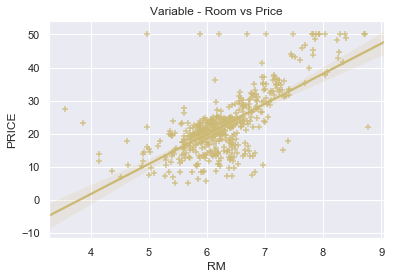

In [36]:
# plot the relationship using regplot
# mark axis, choose colour/marker
# add title and show

sns.regplot(data=bhp, y='PRICE', x='RM', color="y",marker="+", fit_reg = True)
plt.title('Variable - Room vs Price')
plt.show()

# reference - https://seaborn.pydata.org/generated/seaborn.regplot.html


As expected, from the plot above we can see that the median value of the houses is higher where the houses contain more rooms.

### *Price Stats

Plot the distribution of the target variable - median value using displot

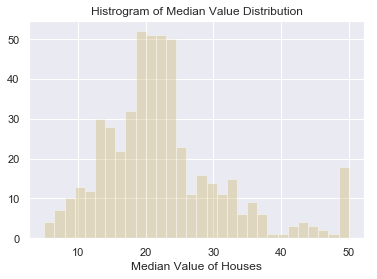

In [17]:
# from seaborn library
# reference: https://seaborn.pydata.org/tutorial/distributions.html

sns.set()
sns.distplot(bhp['PRICE'], hist=True, kde=False, rug_kws={"color": "g"}, color="y", bins=30)

plt.title('Histrogram of Median Value Distribution')
plt.xlabel('Median Value of Houses')
plt.show()

In [27]:
# Find info about pricing data

prices = bhp['PRICE']

In [30]:
# Minimum price of the data
minimum_price = prices.min()

# Maximum price of the data
maximum_price = prices.max()

# Mean price of the data
mean_price = prices.mean()

# Median price of the data
median_price = prices.median()

In [34]:
# Show the calculated statistics
print ("Boston Housing Dataset Statistics: \n")
print ("Number of houses = ", len(prices))
print ("Minimum house price = ", np.min(prices))
print ("Maximum house price = ", np.max(prices))
print ("Mean house price = ", "%.2f" % np.mean(prices))
print ("Median house price = ", "%.2f" % np.median(prices))

Boston Housing Dataset Statistics: 

Number of houses =  506
Minimum house price =  5.0
Maximum house price =  50.0
Mean house price =  22.53
Median house price =  21.20


In [ ]:
# histograms
data.hist()
plt.show()

### Section 2. 
Using statistics analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. 

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

lr = linear_model.LinearRegression()
X, y = datasets.load_boston(return_X_y=True)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()